# <html>

    
<div  style="background-color:w; color:#636363;border:#107ab0; border-width:5px; border-style:solid;">

    
<p><center><img src="https://drive.google.com/thumbnail?id=1yPGYO8HkTanlqsIXozDIUvUVuvawAdG_" width ="6%"  /><font size=8> <b>Modelo Preditivo Qualidade de Água</b></font> </p>
<p ><font size=6><center>Ives Tulio</font> </p>
<p ><font size=4><center><b>email:</b> ivestulio@gmail.com <br> 
<b>Linkedin:</b> in/ives-tulio/<br>
<b>GitHub:</b> ivestulio</p>

</div>
</html>

## Descrição dos Dados: 

Resultado da análise de 3276 amostras de água: 
* pH
* Hardness (Dureza Total)
* Solids (Sólidos Totais Dissolvidos)
* Chloromines
* Sulfate
* Conductivity
* Organic Carbom
* Trihalomethanes
* Turbidity
* **Potability**

## Avaliações:

* Qual a distribuição de dados 
* Qual a relação entre os parãmetros físico-químicos e a qualidade da água.


<div style="background-color:#ccc; color:#06c;">
    <h1><center>Libraries</center></h1>
</div>

In [81]:
# Manipulação de dados:
import pandas as pd 
import missingno as msno 
from collections import Counter
from warnings import filterwarnings


# Visualização Gráfica:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 


# Pré-processamento de dados: 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# Modelos de Classificação 
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier


# Evolução :
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

<div style="background-color:#ccc; color:#06c;">
    <h1><center>Importing the Dataset</center></h1>
</div>

In [82]:
data = pd.read_csv("/home/ives/Desktop/PROGRAMAÇAO/DataAnalisys/Qualidade_agua/data/water_potability.csv")

<div style="background-color:#ccc; color:#06c;">
    <h1><center>Visualizations </center></h1>
</div>

In [83]:
cores = ["#011936","#465362","#82a3a1","#9fc490","#c0dfa1"]

In [84]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [86]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [87]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [88]:
colunas = ["pH","Dureza","Solidos","Cloraminas","Sulfato","Condutividade","Carbono Organico","Trialometanos","Turbidez","Potabilidade"]

In [89]:
data.columns = colunas

In [90]:
data

pH      Dureza       Solidos  Cloraminas     Sulfato  \
0          NaN  204.890455  20791.318981    7.300212  368.516441   
1     3.716080  129.422921  18630.057858    6.635246         NaN   
2     8.099124  224.236259  19909.541732    9.275884         NaN   
3     8.316766  214.373394  22018.417441    8.059332  356.886136   
4     9.092223  181.101509  17978.986339    6.546600  310.135738   
...        ...         ...           ...         ...         ...   
3271  4.668102  193.681735  47580.991603    7.166639  359.948574   
3272  7.808856  193.553212  17329.802160    8.061362         NaN   
3273  9.419510  175.762646  33155.578218    7.350233         NaN   
3274  5.126763  230.603758  11983.869376    6.303357         NaN   
3275  7.874671  195.102299  17404.177061    7.509306         NaN   

      Condutividade  Carbono Organico  Trialometanos  Turbidez  Potabilidade  
0        564.308654         10.379783      86.990970  2.963135             0  
1        592.885359         15.180013      56.329076  4.500656             0  
2        418.606213         16.868637      66.420093  3.055934             0  
3        363.266516         18.436524     100.341674  4.628771             0  
4        398.410813         11.558279      31.997993  4.075075             0  
...             ...               ...            ...       ...           ...  
3271     526.424171         13.894419      66.687695  4.435821             1  
3272     392.449580         19.903225            NaN  2.798243             1  
3273     432.044783         11.039070      69.845400  3.298875             1  
3274     402.883113         11.168946      77.488213  4.708658             1  
3275     327.459760         16.140368      78.698446  2.309149             1  

[3276 rows x 10 columns]

In [91]:
data.isnull().sum()

pH                  491
Dureza                0
Solidos               0
Cloraminas            0
Sulfato             781
Condutividade         0
Carbono Organico      0
Trialometanos       162
Turbidez              0
Potabilidade          0
dtype: int64

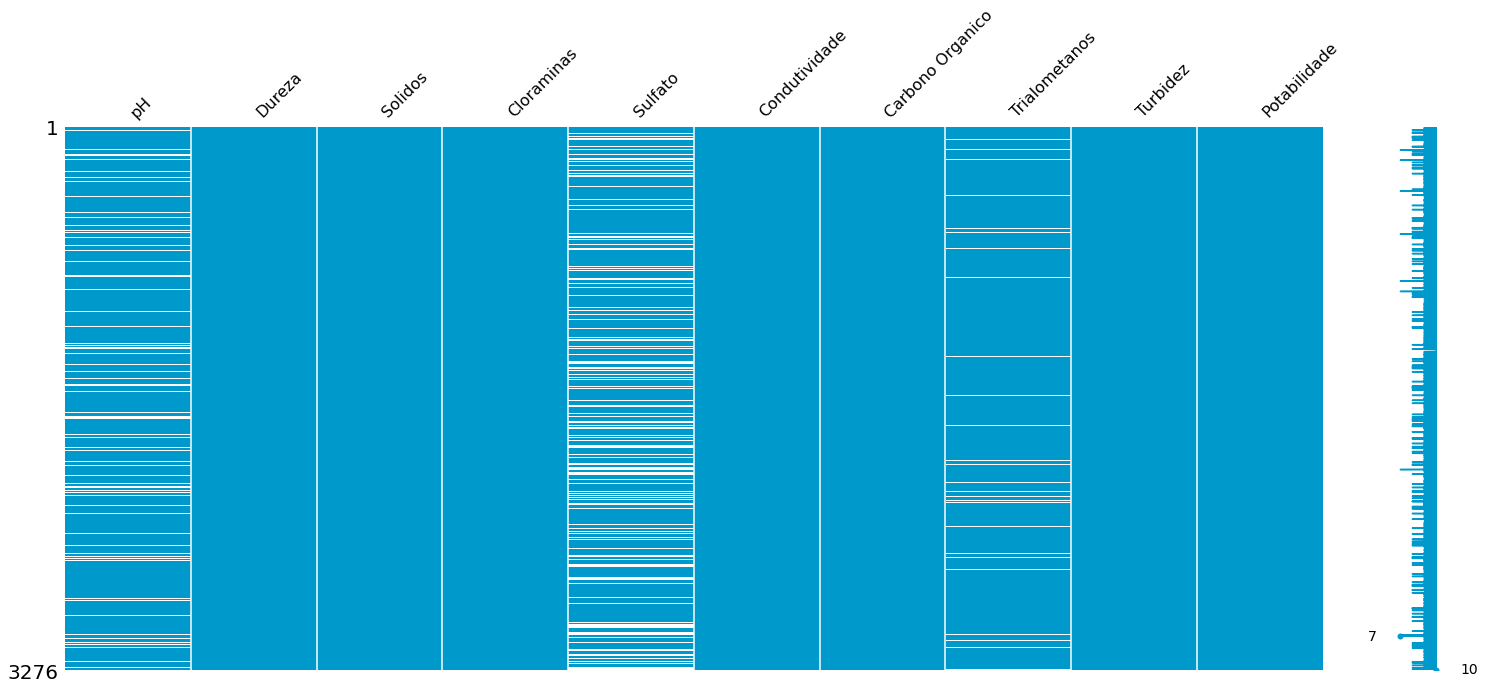

In [92]:

fig = msno.matrix(data, color=(0,0.6,0.8))

In [93]:
import matplotlib.gridspec as gridspec

In [94]:
from matplotlib import figure 

<ipython-input-95-e43e9b426fb5>:32: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "transparente" which is no longer supported as of 3.3 and will become an error two minor releases later



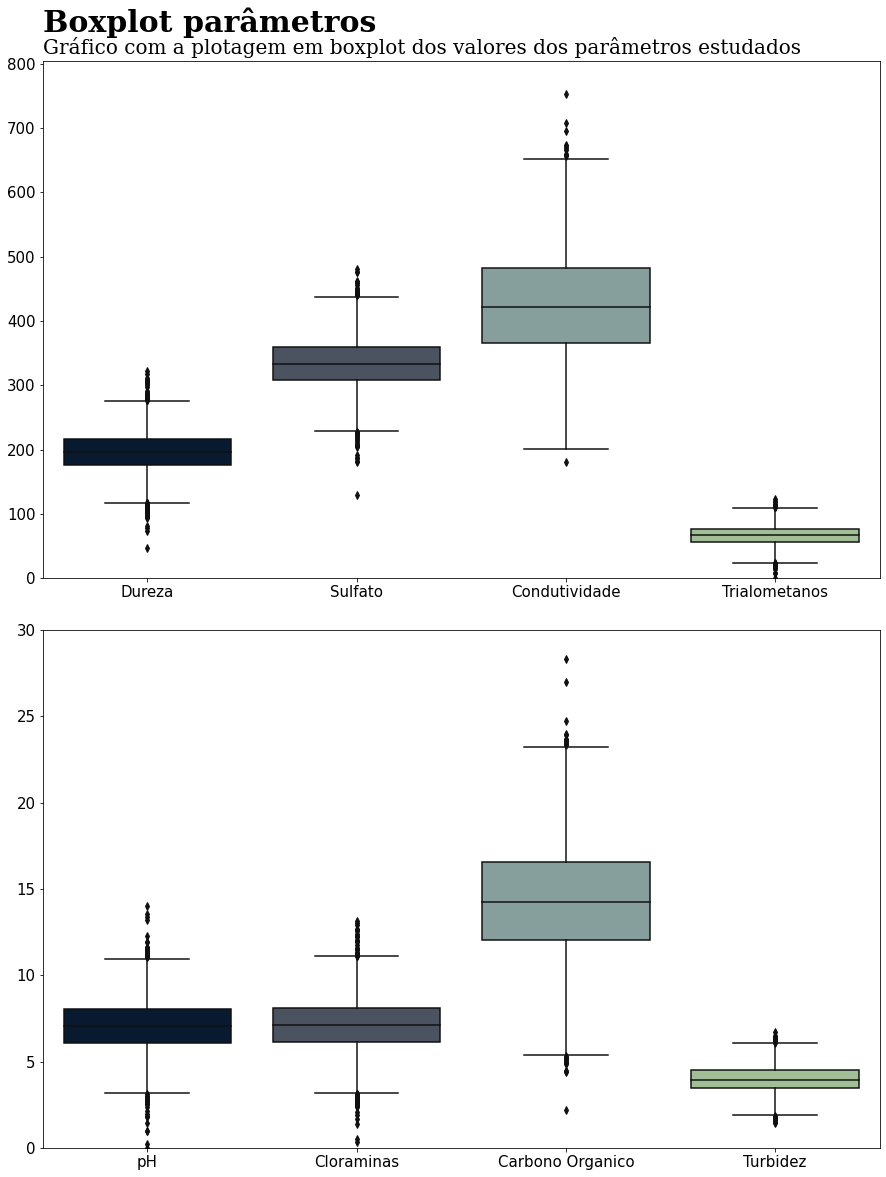

In [95]:
fig= plt.figure(figsize=(15,20)) # create figure

gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=0.1)
ax0 = fig.add_subplot(gs[0, 0], ylim=(0, 805))
ax1 = fig.add_subplot(gs[1, 0], ylim=(0,30)) 

sns.boxplot( data=data.drop(["Solidos","pH","Cloraminas","Carbono Organico","Turbidez","Potabilidade"],axis=1),  orient='v', ax=ax0,palette=cores)
sns.boxplot( data=data.drop(["Solidos","Dureza","Sulfato","Trialometanos","Condutividade","Potabilidade"],axis=1),  orient='v', ax=ax1, palette=cores)



ax0.text(-0.5,850, 
         'Boxplot parâmetros', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax0.text(-0.5,815, 
         'Gráfico com a plotagem em boxplot dos valores dos parâmetros estudados', 
         fontsize=20, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)


plt.savefig("boxplot.png", dpi=200,bbox_inches='tight', transparente = True)


plt.show()


In [96]:
plt.figure(figsize=(20,10))


fig = px.scatter_matrix(data,data.drop('Potabilidade',axis=1),height=1250,width=1250,template='plotly_white',opacity=0.7,
                        color_discrete_sequence=[cores[3],cores[3]],color='Potabilidade',
                      color_continuous_scale=[cores[3],cores[3]])

fig.update_layout(font_family='monospace',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=cores[4]),
                title=dict(text='Gráfico de Dispersão entre parâmetros',x=0.5,y=0.97,
                   font=dict(color=cores[2],size=22)))







fig.show()

<Figure size 1440x720 with 0 Axes>

In [97]:
fig = px.histogram(data, x='Dureza', y =Counter(data['pH']), color="Potabilidade", template='plotly_white',marginal='box', opacity=0.8, nbins=100,color_discrete_sequence=["#c9d179","#3344dd"], barmode='group',histfunc='count')
#fig.add_vline(x=7, line_width=3,line_color="#333333", line_dash='dot',opacity=0.7)

#fig.add_annotation(text='<7 Acid', x = 4, y= 70, showarrow=False, font_size=14)
#fig.add_annotation(text=">7 Basic", x=10, y=70, showarrow=False, font_size=14)
fig.update_layout(font_family='monospace', title=dict(text="Distribuição: Dureza Total", x=0.5, y=0.95), 
                 xaxis_title_text='Dureza (mg/L)',
                 yaxis_title_text='Contagem'
                 )

fig.show()

In [98]:
fig = px.histogram(data, x='Solidos', y =Counter(data['pH']), color="Potabilidade", template='plotly_white',marginal='box', opacity=0.8, nbins=100,color_discrete_sequence=["#c9d179","#3344dd"], barmode='group',histfunc='count')
#fig.add_vline(x=7, line_width=3,line_color="#333333", line_dash='dot',opacity=0.7)

#fig.add_annotation(text='<7 Acid', x = 4, y= 70, showarrow=False, font_size=14)
#fig.add_annotation(text=">7 Basic", x=10, y=70, showarrow=False, font_size=14)
fig.update_layout(font_family='monospace', title=dict(text="Distribuição: STD", x=0.5, y=0.95), 
                 xaxis_title_text='STD (ppm)',
                 yaxis_title_text='Contagem'
                 )

fig.show()

In [99]:
fig = px.histogram(data, x='Cloraminas', y =Counter(data['pH']), color="Potabilidade", template='plotly_white',marginal='box', opacity=0.8, nbins=100,color_discrete_sequence=["#c9d179","#3344dd"], barmode='group',histfunc='count')
#fig.add_vline(x=7, line_width=3,line_color="#333333", line_dash='dot',opacity=0.7)


fig.update_layout(font_family='monospace', title=dict(text="Distribuição: Cloraminas", x=0.5, y=0.95), 
                 xaxis_title_text='Chloraminas (ppm)',
                 yaxis_title_text='Contagem'
                 )

fig.show()

In [100]:
fig = px.histogram(data, x='Sulfato', y =Counter(data['pH']), color="Potabilidade", template='plotly_white',marginal='box', opacity=0.8, nbins=100,color_discrete_sequence=["#c9d179","#3344dd"], barmode='group',histfunc='count')
#fig.add_vline(x=7, line_width=3,line_color="#333333", line_dash='dot',opacity=0.7)

fig.update_layout(font_family='monospace', title=dict(text="Distribuição: Sulfato", x=0.5, y=0.95), 
                 xaxis_title_text='Sulfato (mg/L)',
                 yaxis_title_text='Contagem'
                 )

fig.show()

In [101]:
fig = px.histogram(data, x='Condutividade', y =Counter(data['Condutividade']), color="Potabilidade", template='plotly_white',marginal='box', opacity=0.8, nbins=100,color_discrete_sequence=["#c9d179","#3344dd"], barmode='group',histfunc='count')
#fig.add_vline(x=7, line_width=3,line_color="#333333", line_dash='dot',opacity=0.7)

fig.update_layout(font_family='monospace', title=dict(text="Distributição: Condutividade", x=0.5, y=0.95), 
                 xaxis_title_text='Condutividade (S/cm)',
                 yaxis_title_text='Contagem'
                 )

fig.show()

In [102]:
fig = px.histogram(data, x='Carbono Organico', y =Counter(data['Carbono Organico']), color="Potabilidade", template='plotly_white',marginal='box', opacity=0.8, nbins=100,color_discrete_sequence=["#c9d179","#3344dd"], barmode='group',histfunc='count')
#fig.add_vline(x=7, line_width=3,line_color="#333333", line_dash='dot',opacity=0.7)

fig.update_layout(font_family='monospace', title=dict(text="Distribuição:  Carbono Organico ", x=0.5, y=0.95), 
                 xaxis_title_text='Carbono Organico',
                 yaxis_title_text='Contagem'
                 )

fig.show()

In [103]:
fig = px.histogram(data, x='Trialometanos', y =Counter(data["Trialometanos"]), color="Potabilidade", template='plotly_white',marginal='box', opacity=0.8, nbins=100,color_discrete_sequence=["#c9d179","#3344dd"], barmode='group',histfunc='count')
#fig.add_vline(x=7, line_width=3,line_color="#333333", line_dash='dot',opacity=0.7)

fig.update_layout(font_family='monospace', title=dict(text="Distribuição: Trialometanos", x=0.5, y=0.95), 
                 xaxis_title_text='Trialometanos',
                 yaxis_title_text='Contagem'
                 )

fig.show()

In [104]:
fig = px.histogram(data, x='Turbidez', y =Counter(data['Turbidez']), color="Potabilidade", template='plotly_white',marginal='box', opacity=0.8, nbins=100,color_discrete_sequence=["#c9d179","#3344dd"], barmode='group',histfunc='count')
#fig.add_vline(x=7, line_width=3,line_color="#333333", line_dash='dot',opacity=0.7)

fig.update_layout(font_family='monospace', title=dict(text="Distribuição: Turbidez", x=0.5, y=0.95), 
                 xaxis_title_text='Turbidez',
                 yaxis_title_text='Contagem'
                 )

fig.show()

In [105]:
cor = data.drop("Potabilidade", axis = 1).corr()
cor 

pH    Dureza   Solidos  Cloraminas   Sulfato  \
pH                1.000000  0.082096 -0.089288   -0.034350  0.018203   
Dureza            0.082096  1.000000 -0.046899   -0.030054 -0.106923   
Solidos          -0.089288 -0.046899  1.000000   -0.070148 -0.171804   
Cloraminas       -0.034350 -0.030054 -0.070148    1.000000  0.027244   
Sulfato           0.018203 -0.106923 -0.171804    0.027244  1.000000   
Condutividade     0.018614 -0.023915  0.013831   -0.020486 -0.016121   
Carbono Organico  0.043503  0.003610  0.010242   -0.012653  0.030831   
Trialometanos     0.003354 -0.013013 -0.009143    0.017084 -0.030274   
Turbidez         -0.039057 -0.014449  0.019546    0.002363 -0.011187   

                  Condutividade  Carbono Organico  Trialometanos  Turbidez  
pH                     0.018614          0.043503       0.003354 -0.039057  
Dureza                -0.023915          0.003610      -0.013013 -0.014449  
Solidos                0.013831          0.010242      -0.009143  0.019546  
Cloraminas            -0.020486         -0.012653       0.017084  0.002363  
Sulfato               -0.016121          0.030831      -0.030274 -0.011187  
Condutividade          1.000000          0.020966       0.001285  0.005798  
Carbono Organico       0.020966          1.000000      -0.013274 -0.027308  
Trialometanos          0.001285         -0.013274       1.000000 -0.022145  
Turbidez               0.005798         -0.027308      -0.022145  1.000000

In [106]:
import matplotlib.pyplot as plt

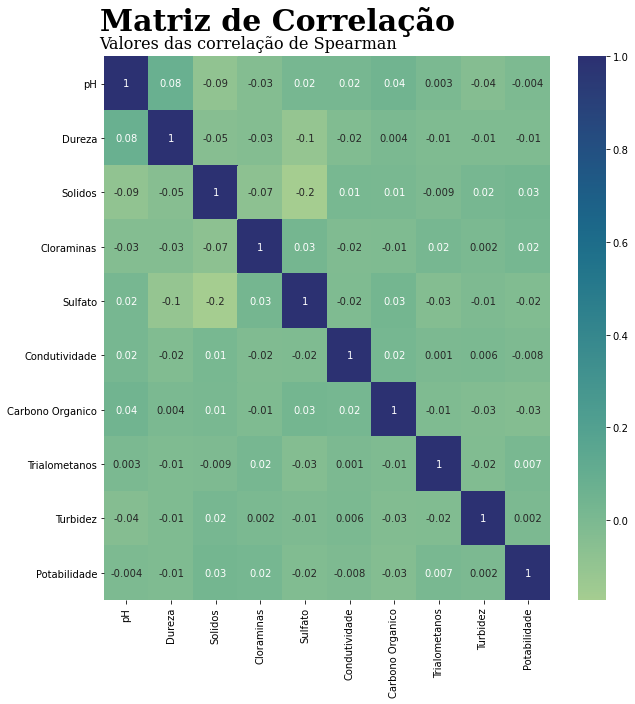

In [107]:
fig,ax = plt.subplots(figsize=(10,10))
#plt.figure(figsize=(20, 10))

#fig, ax =plt.subplots(figsize=(20,10))


sns.heatmap(data.corr(), annot=True, fmt='.1g',cmap='crest',)

ax.text(-0.1,-0.48, 
         'Matriz de Correlação', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax.text(-0.10,-0.15, 
         'Valores das correlação de Spearman', 
         fontsize=16, 
         fontweight='light', 
         fontfamily='serif',
        )



plt.savefig("matriz_corr.png", dpi=100,bbox_inches='tight', transparent=True)




<div style="background-color:#ccc; color:#06c;">
    <h1><center>Data Tratament </center></h1>
</div>

In [108]:
data.isnull().sum()

pH                  491
Dureza                0
Solidos               0
Cloraminas            0
Sulfato             781
Condutividade         0
Carbono Organico      0
Trialometanos       162
Turbidez              0
Potabilidade          0
dtype: int64

In [109]:
data.dropna(inplace=True)

<div style="background-color:#ccc; color:#06c;">
    <h1><center>Modelling </center></h1>
</div>

<div style="background-color:#ccc; color:#06c;">
    <h4><center>Divindindo os Dados:</center></h4>
</div>

In [110]:
from sklearn.model_selection import train_test_split 

In [111]:
X = data.drop("Potabilidade", axis = 1)

In [112]:
y = data['Potabilidade']

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 24 )

<div style="background-color:#ccc; color:#06c;">
    <h4><center>Standardizing the Data:</center></h4>
</div>


In [114]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

info = [(" LogisticRegression(max_iter=1000)),
          ("SVC", SVC()),
          ("KNC", KNeighborsClassifier(n_neighbors=10)),
          ("DTC", DecisionTreeClassifier()),
          ("GNB", GaussianNB()),
          ("SGDC", SGDClassifier()),
          ("Perc", Perceptron()),
          ("NC", NearestCentroid()),
          ("Ridge", RidgeClassifier()),
          ("NuSVC", NuSVC()),
          ("BNB", BernoulliNB()),
          ("RF", RandomForestClassifier()),
          ("ADA", AdaBoostClassifier()),
          ("XGB", GradientBoostingClassifier()),
          ("PAC", PassiveAggressiveClassifier())
]

<div style="background-color:#ccc; color:#06c;">
    <h4><center>Spot Checking</center></h4>
</div>

In [115]:
filterwarnings('ignore')
models = [("Logistic Regression", LogisticRegression(max_iter=1000)),
          ("SVC", SVC()),
          ("KNeighborsC", KNeighborsClassifier(n_neighbors=10)),
          ("Decision Tree C", DecisionTreeClassifier()),
          ("GaussianNB", GaussianNB()),
          ("SGDC", SGDClassifier()),
          ("Perceptron", Perceptron()),
          ("NearestCentroid", NearestCentroid()),
          ("Ridge", RidgeClassifier()),
          ("NuSVC", NuSVC()),
          ("BernoulliNB", BernoulliNB()),
          ("RandomForest", RandomForestClassifier()),
          ("ADA", AdaBoostClassifier()),
          ("Gradient Boosting", GradientBoostingClassifier()),
          ("Passive AgressiveC", PassiveAggressiveClassifier())
]

results = []
names = []
finalresults = []

for name, model in models:
    model.fit(x_train, y_train)
    model_results = model.predict(x_test)
    score = precision_score(y_test, model_results, average ='macro')
    results.append(score)
    names.append(name)
    finalresults.append((name,score))
    
finalresults.sort(key=lambda k:k[1],reverse=True)


In [116]:
SVC()

SVC()

In [117]:
finalresults

[('SVC', 0.6978494623655914),
 ('KNeighborsC', 0.6848348348348348),
 ('NuSVC', 0.6770880107768298),
 ('Logistic Regression', 0.6759450171821306),
 ('Ridge', 0.6759450171821306),
 ('RandomForest', 0.6736596736596736),
 ('Gradient Boosting', 0.6505940027195305),
 ('GaussianNB', 0.6047794117647058),
 ('Decision Tree C', 0.5860323886639676),
 ('ADA', 0.5790322580645162),
 ('Perceptron', 0.5389830034663983),
 ('Passive AgressiveC', 0.538678712591756),
 ('SGDC', 0.48396493369583315),
 ('NearestCentroid', 0.4357371794871795),
 ('BernoulliNB', 0.3027295285359802)]

In [118]:
from tabulate import tabulate 

In [119]:
print(tabulate(finalresults, headers=["Modelos","Precisão"], tablefmt='fancy_grid'))
#plt.savefig('mytable.png')

╒═════════════════════╤════════════╕
│ Modelos             │   Precisão │
╞═════════════════════╪════════════╡
│ SVC                 │   0.697849 │
├─────────────────────┼────────────┤
│ KNeighborsC         │   0.684835 │
├─────────────────────┼────────────┤
│ NuSVC               │   0.677088 │
├─────────────────────┼────────────┤
│ Logistic Regression │   0.675945 │
├─────────────────────┼────────────┤
│ Ridge               │   0.675945 │
├─────────────────────┼────────────┤
│ RandomForest        │   0.67366  │
├─────────────────────┼────────────┤
│ Gradient Boosting   │   0.650594 │
├─────────────────────┼────────────┤
│ GaussianNB          │   0.604779 │
├─────────────────────┼────────────┤
│ Decision Tree C     │   0.586032 │
├─────────────────────┼────────────┤
│ ADA                 │   0.579032 │
├─────────────────────┼────────────┤
│ Perceptron          │   0.538983 │
├─────────────────────┼────────────┤
│ Passive AgressiveC  │   0.538679 │
├─────────────────────┼────────────┤
│

In [120]:
data

pH      Dureza       Solidos  Cloraminas     Sulfato  \
3      8.316766  214.373394  22018.417441    8.059332  356.886136   
4      9.092223  181.101509  17978.986339    6.546600  310.135738   
5      5.584087  188.313324  28748.687739    7.544869  326.678363   
6     10.223862  248.071735  28749.716544    7.513408  393.663396   
7      8.635849  203.361523  13672.091764    4.563009  303.309771   
...         ...         ...           ...         ...         ...   
3267   8.989900  215.047358  15921.412018    6.297312  312.931022   
3268   6.702547  207.321086  17246.920347    7.708117  304.510230   
3269  11.491011   94.812545  37188.826022    9.263166  258.930600   
3270   6.069616  186.659040  26138.780191    7.747547  345.700257   
3271   4.668102  193.681735  47580.991603    7.166639  359.948574   

      Condutividade  Carbono Organico  Trialometanos  Turbidez  Potabilidade  
3        363.266516         18.436524     100.341674  4.628771             0  
4        398.410813         11.558279      31.997993  4.075075             0  
5        280.467916          8.399735      54.917862  2.559708             0  
6        283.651634         13.789695      84.603556  2.672989             0  
7        474.607645         12.363817      62.798309  4.401425             0  
...             ...               ...            ...       ...           ...  
3267     390.410231          9.899115      55.069304  4.613843             1  
3268     329.266002         16.217303      28.878601  3.442983             1  
3269     439.893618         16.172755      41.558501  4.369264             1  
3270     415.886955         12.067620      60.419921  3.669712             1  
3271     526.424171         13.894419      66.687695  4.435821             1  

[2011 rows x 10 columns]

In [121]:
fig = px.scatter_matrix(data,data.drop("Potabilidade",axis=1),height=1250,width=1250,template='plotly_white',opacity=0.7,
                        color_discrete_sequence=[cores[3],cores[3]],color='Potabilidade',
                       symbol='Potabilidade',color_continuous_scale=[cores[3],cores[3]])

fig.update_layout(font_family='monospace',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=cores[4]),
                 title=dict(text='Gráfico de dispersão entre os valores',x=0.5,y=0.97,
                   font=dict(color=cores[2],size=24)))
fig.show()

* The 3 best models are : RF , SVC , KNC

<div style="background-color:#ccc; color:#06c;">
    <h4><center>Hyperparameter Tuning</center></h4>
</div>

In [122]:
# Grid search  and Space:

model_params = {
    "RF":{'model':RandomForestClassifier(),
         'params':{
             'max_features': list(range(1,10)),
             'n_estimators':[10,100,1000]
         }},
    'SVC':{'model':SVC(),
           'params':{
               'kernel':['lienar','poly','rbf','sigmoid'],
               'C':[100,10,1.0,0.1,0.001]
           }},
    'KNC':{'model':KNeighborsClassifier(),
           'params':{
               'n_neighbors':list(range(1,21)),
               'metric':['euclidean','manhattan','minkowski'],
               'weights':['uniform','distance']
           }}
    }

# Evaluation:

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

#Search:
scores=[]
for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv , n_iter=10)
    rs.fit(x_train, y_train)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
da=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
da

Model                                         Parameters     Score
0    RF          {'n_estimators': 1000, 'max_features': 5}  0.675691
1   SVC                        {'kernel': 'rbf', 'C': 100}  0.615662
2   KNC  {'weights': 'distance', 'n_neighbors': 20, 'me...  0.644273

In [129]:
print(tabulate(da,  tablefmt='fancy_grid'))


╒═══╤═════╤═══════════════════════════════════════════════════════════════════╤══════════╕
│ 0 │ RF  │ {'n_estimators': 1000, 'max_features': 5}                         │ 0.675691 │
├───┼─────┼───────────────────────────────────────────────────────────────────┼──────────┤
│ 1 │ SVC │ {'kernel': 'rbf', 'C': 100}                                       │ 0.615662 │
├───┼─────┼───────────────────────────────────────────────────────────────────┼──────────┤
│ 2 │ KNC │ {'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan'} │ 0.644273 │
╘═══╧═════╧═══════════════════════════════════════════════════════════════════╧══════════╛


<div style="background-color:#ccc; color:#06c;">
    <h4><center>Modelo Final</center></h4>
</div

In [123]:
rf = RandomForestClassifier(n_estimators=100, max_features=3)

rf.fit(x_train,y_train)
potability = rf.predict(x_test)

In [124]:
# Grid Search:

model = LogisticRegression()

# Search Space:

space = {'solver':['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty':['none', 'l1', 'l2', 'elasticnet'],
        'C':[100, 10, 1.0, 0.1, 0.01]}
# Evaluation:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state=1)
# Search:

search = GridSearchCV(model, space, cv=cv , scoring='accuracy', n_jobs=-1)

result=search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.5994979296066253
Best Hyperparameters: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
